In [1]:
%cd ..

/home/proste/mff/evgena


In [2]:
import os

import numpy as np
import seaborn as sns

from evgena.dataset import Dataset
from evgena.model import TrainableTfModel
from evgena.data_transformations import decode_labels, images_to_BHWC

Using TensorFlow backend.


## FGSM white-box ##

In [18]:
step_stats = {'mean': [], 'median': [], 'p95': []}
noise_stats = {'mean': [], 'median': [], 'p95': []}
fails = []

architecture = 'simple_cnn'

for f_i in range(10):
    results = np.load(
        'experiments/{a}_{f}_fgsm_white_single_non_targeted.npz'.format(
            a=architecture, f=f_i
        )
    )
    
    step_count = results['step_count']
    step_stats['mean'].append(np.mean(step_count))
    step_stats['median'].append(np.median(step_count))
    step_stats['p95'].append(np.percentile(step_count, 95))
    
    noise_steps = np.mean(255 * np.abs(results['noise']), axis=(1, 2, 3))
    noise_stats['mean'].append(np.mean(noise_steps))
    noise_stats['median'].append(np.median(noise_steps))
    noise_stats['p95'].append(np.percentile(noise_steps, 95))
    
    fails.append(np.where(step_count == 2047)[0])

In [6]:
step_stats, noise_stats, fails

({'mean': [3.6977,
   3.3964,
   3.6121,
   3.459,
   3.4673,
   3.52,
   3.5629,
   3.5123,
   3.3876,
   3.4192],
  'median': [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
  'p95': [9.0, 9.0, 10.0, 10.0, 9.0, 9.0, 9.0, 10.0, 8.0, 9.0]},
 {'mean': [3.0698102,
   2.8738964,
   2.9785304,
   2.9136422,
   2.9398623,
   2.9199538,
   2.9812183,
   2.9133236,
   2.9477184,
   2.9373355],
  'median': [2.9617348,
   2.7984693,
   2.8443878,
   2.7295918,
   2.875,
   2.7704082,
   2.864796,
   2.7653062,
   2.864796,
   2.8265307],
  'p95': [5.75,
   5.290943861007689,
   5.857142925262451,
   5.928698778152464,
   5.3598215579986555,
   5.69132661819458,
   5.642984628677366,
   5.719642639160153,
   5.321556305885313,
   5.5790815353393555]},
 [array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([]

In [83]:
step_stats = {'mean': [], 'median': [], 'p95': []}
noise_stats = {'mean': [], 'median': [], 'p95': []}
fails = []

architecture = 'densenet'
l_i = 9

for f_i in range(10):
    results = np.load(
        'experiments/{a}_{f}_fgsm_white_single_targeted_{l}.npz'.format(
            a=architecture, f=f_i, l=l_i
        )
    )
    
    step_count = results['step_count']
    step_stats['mean'].append(np.mean(step_count))
    step_stats['median'].append(np.median(step_count))
    step_stats['p95'].append(np.percentile(step_count, 95))
    
    noise_steps = np.mean(255 * np.abs(results['noise']), axis=(1, 2, 3))
    noise_stats['mean'].append(np.mean(noise_steps))
    noise_stats['median'].append(np.median(noise_steps))
    noise_stats['p95'].append(np.percentile(noise_steps, 95))
    
    fails.append(np.where(step_count == 2047)[0])

In [84]:
step_stats, noise_stats, fails

({'mean': [11.224,
   13.23611111111111,
   10.099,
   11.749666666666666,
   10.611222222222223,
   9.765444444444444,
   9.434222222222223,
   12.122777777777777,
   9.558333333333334,
   11.229555555555555],
  'median': [10.0, 10.0, 8.0, 10.0, 10.0, 9.0, 9.0, 11.0, 9.0, 10.0],
  'p95': [23.0, 34.0, 23.0, 26.0, 22.0, 20.0, 19.0, 25.0, 20.0, 24.0]},
 {'mean': [5.3287616,
   5.296943,
   5.071374,
   5.1956725,
   5.0873704,
   4.968902,
   4.9473705,
   5.33578,
   4.868301,
   5.3210487],
  'median': [5.1862245,
   5.140306,
   4.836735,
   4.862245,
   5.0790815,
   4.8163266,
   4.9272957,
   5.285714,
   4.9234695,
   5.232143],
  'p95': [7.95676016807556,
   8.704209089279173,
   8.010331869125364,
   9.183801412582396,
   7.530739998817443,
   7.885204315185547,
   7.461734771728516,
   8.158226871490477,
   7.073979377746582,
   8.387755393981934]},
 [array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),


In [7]:
import pandas as pd

In [27]:
step_counts = {}
for model_type in ['densenet', 'simple_cnn']:
    model_step_counts = []
    for f_i in range(10):
        with np.load('experiments/{}_{}_fgsm_white_single_non_targeted.npz'.format(model_type, f_i)) as res_f:
            model_step_counts.append(res_f['step_count'])
        
    step_counts[model_type] = np.concatenate(model_step_counts)

In [28]:
step_pd = pd.DataFrame(step_counts)

In [29]:
step_pd

,densenet,simple_cnn
0,6,8
1,2,10
2,10,32
3,7,21
4,0,0
5,9,26
6,2,6
7,7,12
8,6,9
9,10,12


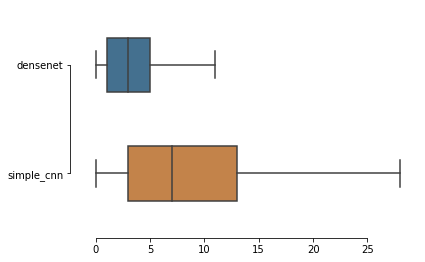

In [47]:
sns.boxplot(data=step_pd, orient='h', showfliers=False, width=0.5, saturation=0.5, )
sns.despine(offset=10, trim=True)